# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science

## Homework 3  AC209 : Linear Algebra, Accuracy, and Confidence Intervals


**Harvard University**<br/>
**Fall 2021**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2pt">


In [1]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

### INSTRUCTIONS

- **THIS IS AN INDIVIDUAL ASSIGNMENT. Collaboration on this homework is NOT PERMITTED.**

- To submit your assignment follow the instructions given in canvas.

- As much as possible, try and stick to the provided hints, as well as the functions we import at the top of the homework. Those are the ideas and tools supported and taught by this course. If a problem specifies a particular library, you are required to use that library, and possibly others too from the import list.

- Please **restart the kernel and run the entire notebook again before you submit.**

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code continues to work, restart the kernel and rerun your notebook periodically while working through this assignment. 

- Please use `.head(...)` when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print(...)` function that clearly labels the output, includes a reference to the calculated value, and rounds it to a reasonable number of digits. **Do not hard code values in your printed output**. For example, this is an appropriate print statement:
```python
print(f'The R^2 is {R:.4f}')
```

- **Your plots MUST be clearly labeled and easy to read,** including clear labels for the $x$ and $y$ axes, a descriptive title ("MSE plot" is NOT a descriptive title; "95% confidence interval of coefficients for degree-5 polynomial model" on the other hand is descriptive), a legend when appropriate, and clearly formatted text and graphics.

- **Your code may also be evaluated for efficiency and clarity.** As a result, correct output is not always sufficient for full credit.

### IMPORTS

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

**The data for this supplement are imported for you in the cells below.**

In [3]:
df = pd.read_csv('data/cleaned_mtcars.csv')
df.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
y = df[['mpg']].values
X = df[['cyl','disp','hp','wt','qsec']]

X = sm.add_constant(X)

<hr style="height:2pt">

## Linear Algebra, Accuracy, and Confidence Intervals

In this homework, you will see how *uncertainty* in the $\beta$ coefficients can directly impact our ability to make predictions with a linear regression model and how in general we can do inference on the predictors. 

### First a little review...

The linear model assumes:

$$ y_i \sim N(\beta_0+\beta_1 x_i,\sigma^2 )   $$

This means, pun intended, that $ \mu_{y_i} = \beta_0+\beta_1 x_i $, which can be estimated with $ \hat{\mu}_{y_i} = \hat{\beta}_0+\hat{\beta}_1 x_i $.

And for a new observation not in the data set, once we measure the new predictor value, $x^*$, we can predict its response, $y^*$, from our model as:

$$\hat{y}^* = \hat{\mu}_{y_i} + \hat{\varepsilon}^* $$

Which can be calculated by using the estimate for $\hat{\mu}_{y_i}$ and adding on a randomly selected value for $\hat{\varepsilon}^*$ from its assumed (and estimated) distribution, $N(0,\hat{\sigma}^2)$.


## <div class='exercise'>Question 1 [20 pts]</div>

**1.1** Fit a simple linear regression model to predict `mpg` with `disp` using [OLS](https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html) from `statsmodels.api` which will calculate confidence intervals (and other useful statistics) for you. Be aware that (1) unlike sklearn's LinearRegression, statsmodels does **not** add an intercept by default and (2) the expected order of arguments to `fit()` is flipped: $y$ first, then $X$. You can use `sm.add_constant()` to add the ones column. As always, be sure to consult the [documentation](https://www.statsmodels.org/dev/index.html). Once you've fit the model you can can call `your_fitted_OLS.get_prediction().summary_frame()` to access the confidence intervals for our true mean predictions at various values of `disp` and make a well-labeled plot showing:

 1. The observed values of `disp` and `mpg`.
 2. The estimated regression line.
 3. The upper and lower bounds of the 95% confidence interval for the true average (not the observed) `mpg` at any given displacement.
 
**1.2** Why do we have a confidence interval for our true mean prediction values?  Why isn't the mean prediction just a single number?

**1.3** Someone asks what mean `mpg` you would predict for a `disp` value of 400. What do you tell them?  How about when paying attention to the confidence interval (1.1.3) above?

**1.4** Why does the 95% confidence interval for the mean predicted `mpg` become wider as we move away from the data's center? 

**1.5** An alternative way to produce the confidence intervals from 1.1 is through the bootstrap.  Create 100 bootstrap samples in order to create 100 bootstrapped regression models and store their estimated intercept and slope values.  Use these bootstrapped estimates to build the 95% confidence intervals as in 1.1, and recreate the plot from that question with your new bootstrapped confidence intervals.  Compare this new plot to the one from 1.1.

**1.6** Another interval of uncertainty in a regression model is called a *prediction interval*.  A prediction interval gives a range of plausible values for a future individual observation, $\hat{y}^*$, given a specific value of $x$ in general (`disp` here).  How should the 95\% prediction interval calculated at a `disp` value of 400 compare to the corresponding 95\% confidence interval for the mean predicted `mpg`?  Justify with a few sentences.


## Solutions

<div class='exercise-r'>

**1.1** Fit a simple linear regression model to predict `mpg` with `disp`. Use the `your_fitted_OLS.get_prediction().summary_frame()` method to access the confidence intervals for our true mean predictions at various values of `disp` and make a well-labeled plot showing:

 1. The observed values of `disp` and `mpg`.
 2. The estimated regression line.
 3. The upper and lower bounds of the 95% confidence interval for the true average (not the observed) `mpg` at any given displacement.

</div>

In [5]:
# your code here 
model = sm.OLS(y, X)
your_fitted_OLS = model.fit()
print(your_fitted_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     29.51
Date:                Sat, 16 Oct 2021   Prob (F-statistic):           6.18e-10
Time:                        19:38:52   Log-Likelihood:                -72.003
No. Observations:                  32   AIC:                             156.0
Df Residuals:                      26   BIC:                             164.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8736      9.918      3.617      0.0

In [6]:
your_fitted_OLS.get_prediction().summary_frame().head() #confidence interval for y pred predicted with everything

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,22.214430,1.007194,20.144112,24.284747,16.584253,27.844606
1,21.279124,0.956612,19.312779,23.245469,15.686344,26.871904
2,25.987760,0.763518,24.418326,27.557194,20.521884,31.453635
3,21.627850,0.869521,19.840523,23.415177,16.095471,27.160228
4,17.940096,1.098497,15.682102,20.198089,12.238236,23.641956


In [7]:
X_disp = X[['const', 'disp']] # this because in Linear Regression we have the constant added for us for free, here I we dont, so I have to call it

In [8]:
X_disp =X[['const','disp']]
model_disp = sm.OLS(y, X_disp)
your_fitted_OLS_disp = model_disp.fit()
your_fitted_OLS_disp.get_prediction().summary_frame().head() 


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,23.005436,0.664391,21.648568,24.362303,16.227868,29.783003
1,23.005436,0.664391,21.648568,24.362303,16.227868,29.783003
2,25.148622,0.815316,23.483523,26.813720,18.302683,31.994561
3,18.966354,0.588977,17.763503,20.169205,12.217933,25.714774
4,14.762412,0.837509,13.051990,16.472833,7.905308,21.619515


In [9]:
disp_summary = your_fitted_OLS_disp.get_prediction().summary_frame()
# Here i am adding a column to the summary of my fitted OLS disp
disp_summary['x_disp'] = X['disp']
disp_summary['y']= y 
disp_summary.head()


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,x_disp,y
0,23.005436,0.664391,21.648568,24.362303,16.227868,29.783003,160.0,21.0
1,23.005436,0.664391,21.648568,24.362303,16.227868,29.783003,160.0,21.0
2,25.148622,0.815316,23.483523,26.813720,18.302683,31.994561,108.0,22.8
3,18.966354,0.588977,17.763503,20.169205,12.217933,25.714774,258.0,21.4
4,14.762412,0.837509,13.051990,16.472833,7.905308,21.619515,360.0,18.7


In [10]:
# I need to sort the values otherwise the graph will be wrong

# Here I sort the values of the entire table based on the newly added column x_disp
disp_summary.sort_values(by='x_disp', inplace=True)

# Here I am getting the valiable out of these columns
mean_v = disp_summary['mean']
lower_CI=disp_summary['mean_ci_lower']
upper_CI=disp_summary['mean_ci_upper']

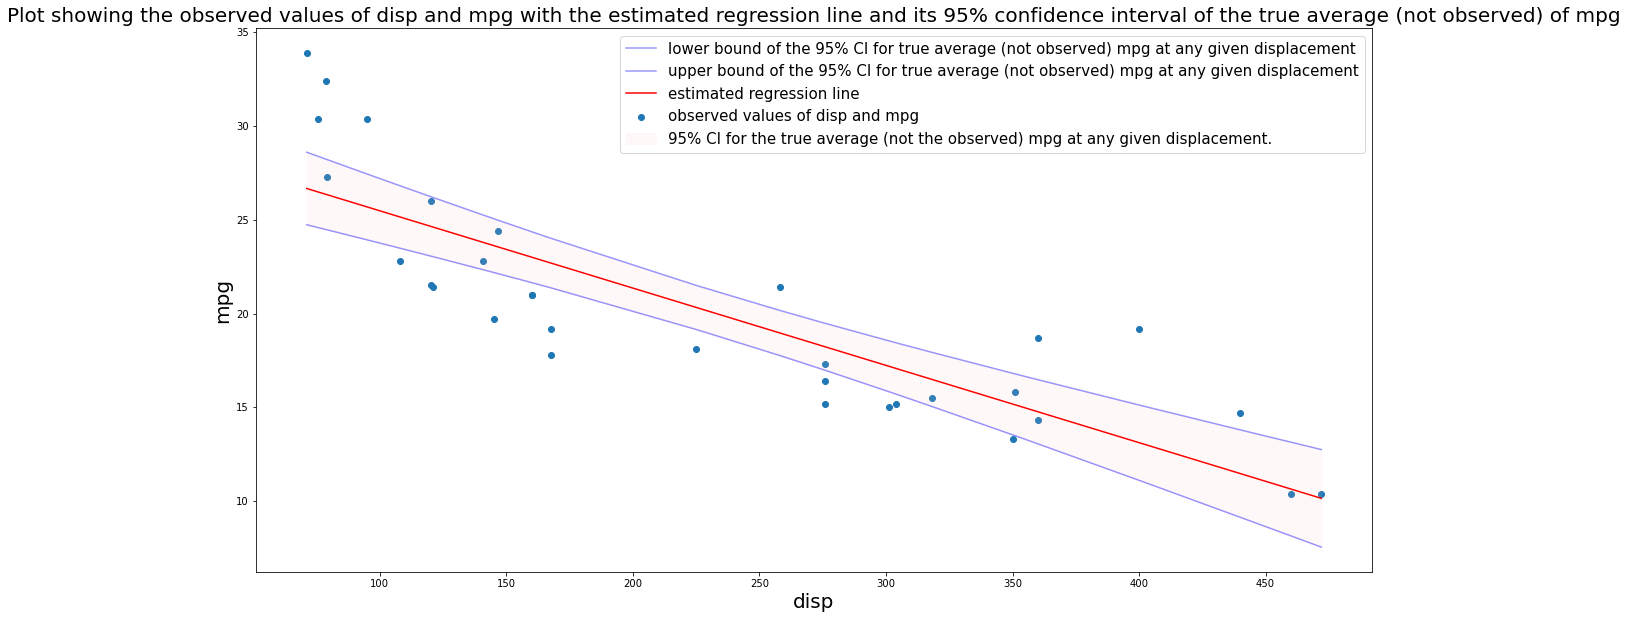

In [11]:
plt.figure(figsize = (20, 10))
plt.title('Plot showing the observed values of disp and mpg with the estimated regression line and its 95% confidence interval of the true average (not observed) of mpg', size = 20)
plt.scatter(disp_summary['x_disp'], disp_summary['y'], label='observed values of disp and mpg')
plt.plot(disp_summary['x_disp'], lower_CI, color='blue', alpha = 0.4, label = 'lower bound of the 95% CI for true average (not observed) mpg at any given displacement')
plt.plot(disp_summary['x_disp'], upper_CI, color='blue', alpha=0.4, label = 'upper bound of the 95% CI for true average (not observed) mpg at any given displacement')
plt.plot(disp_summary['x_disp'], mean_v, color='red', label = 'estimated regression line')
plt.fill_between(disp_summary['x_disp'], lower_CI, upper_CI, color='pink', alpha = 0.1, label='95% CI for the true average (not the observed) mpg at any given displacement.')
plt.xlabel('disp', size = 20)
plt.ylabel('mpg', size = 20)
plt.legend(fontsize = 15)
plt.show()


<div class='exercise-r'>

**1.2** Why do we have a confidence interval for our true mean prediction values?  Why isn't the mean prediction just a single number?

</div>

**We have a confidence interval for the true mean prediction values because we have to mistrust the values of the betas. The betas are an estimation of the real betas, because: 1. there wll always be observational error, this is called aleatoric error, or irreducible error; 2. we also do not know the exact form of the funciton f(x), this is called a misspecification error, and is part of the epistemic error. These two erros make up the error $\hat{\varepsilon}$ (from slide 11 from 'Inference in Linear Regression' slides deck ). Given this error, every time we  we measure the reponse y for a fix value of x we will get a different outcome due to a different b0 and b1 every time. Hence, we have a confidence interval instead of a single number.**


<div class='exercise-r'>

**1.3** Someone asks what mean `mpg` you would predict for a `disp` value of 400. What do you tell them?  How about when paying attention to the confidence interval (1.1.3) above?

</div>

In [12]:
pred_400 = your_fitted_OLS_disp.get_prediction([1, 400]).summary_frame()

pred_400

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,13.113807,0.983136,11.105976,15.121638,6.176537,20.051077


**We are predicting the mean mpg for a given disp of 400. Here we are not predicting mpg, the y, we are actually predicting the mean of y, i.e. the mean of mpg. Additionally, this prediction is not exactly 13. This prediction will lie between the lower bar of the confidence interval and the upper part of the confidence interval, i.e. between 11.105976 and 15.121638.**


<div class='exercise-r'>

**1.4** Why does the 95% confidence interval for the mean predicted `mpg` become wider as we move away from the data's center?

</div>


**This comes from the formula of the prediction confidence interval. The farther we are from the mean, the more uncertain our predictions.**


<div class='exercise-r'>

**1.5** An alternative way to produce the confidence intervals from 1.1 is through the bootstrap.  Create 100 bootstrap samples in order to create 100 bootstrapped regression models and store their estimated intercept and slope values.  Use these bootstrapped estimates to build the 95\% confidence intervals as in 1.1, and recreate the plot from that question with your new bootstrapped confidence intervals.  Compare this new plot to the one from 1.1.

</div>

In [13]:
# Set the number of bootstraps 
numboot = 100
x_linspace = np.linspace(1,500,100).reshape(-1,1)
beta0_list = []
beta1_list = []
predictions_list = []
my_predictions = []

# Loop through each bootstrap
for i in range(numboot):

    # Create bootstrapped version of the data using the sample function
    # Set frac=1 and replace=True to get a bootstrap
    df_new = df.sample(frac=1, replace=True)

    x = df_new[['disp']]
    y = df_new['mpg']

    # Initialize a Linear Regression model
    linreg = LinearRegression()

    # Fit the model on the new data
    linreg.fit(x,y)
    intercepts = linreg.intercept_
    beta0_list.append(intercepts)
    
    coeffs = linreg.coef_
    beta1_list.append(coeffs)

    # Predict on the bootstrapped data
    y_pred = linreg.predict(x_linspace) 
    predictions_list.append(y_pred)
    
    my_pred = intercepts + coeffs*x_linspace
    my_predictions.append(my_pred)


#This is the prediction of the mean of MPG
preds_sorted = np.sort(predictions_list, axis =0)
line_mean_mpg = np.percentile(preds_sorted, 50, axis =0)
lower_b_preds = np.percentile(preds_sorted, 2.5, axis = 0)
upper_b_preds = np.percentile(preds_sorted, 97.5, axis =0)

#This is the prediction of the mean of MPG
my_preds_sorted = np.sort(my_predictions, axis =0)
my_line_mean_mpg = np.percentile(my_preds_sorted, 50, axis =0)
my_lower_b_preds = np.percentile(my_preds_sorted, 2.5, axis = 0)
my_upper_b_preds = np.percentile(my_preds_sorted, 97.5, axis =0)


In this plot I use the predictions I created my self with the beta0 ad beta1 out of each fitted linear model in each bootstrap


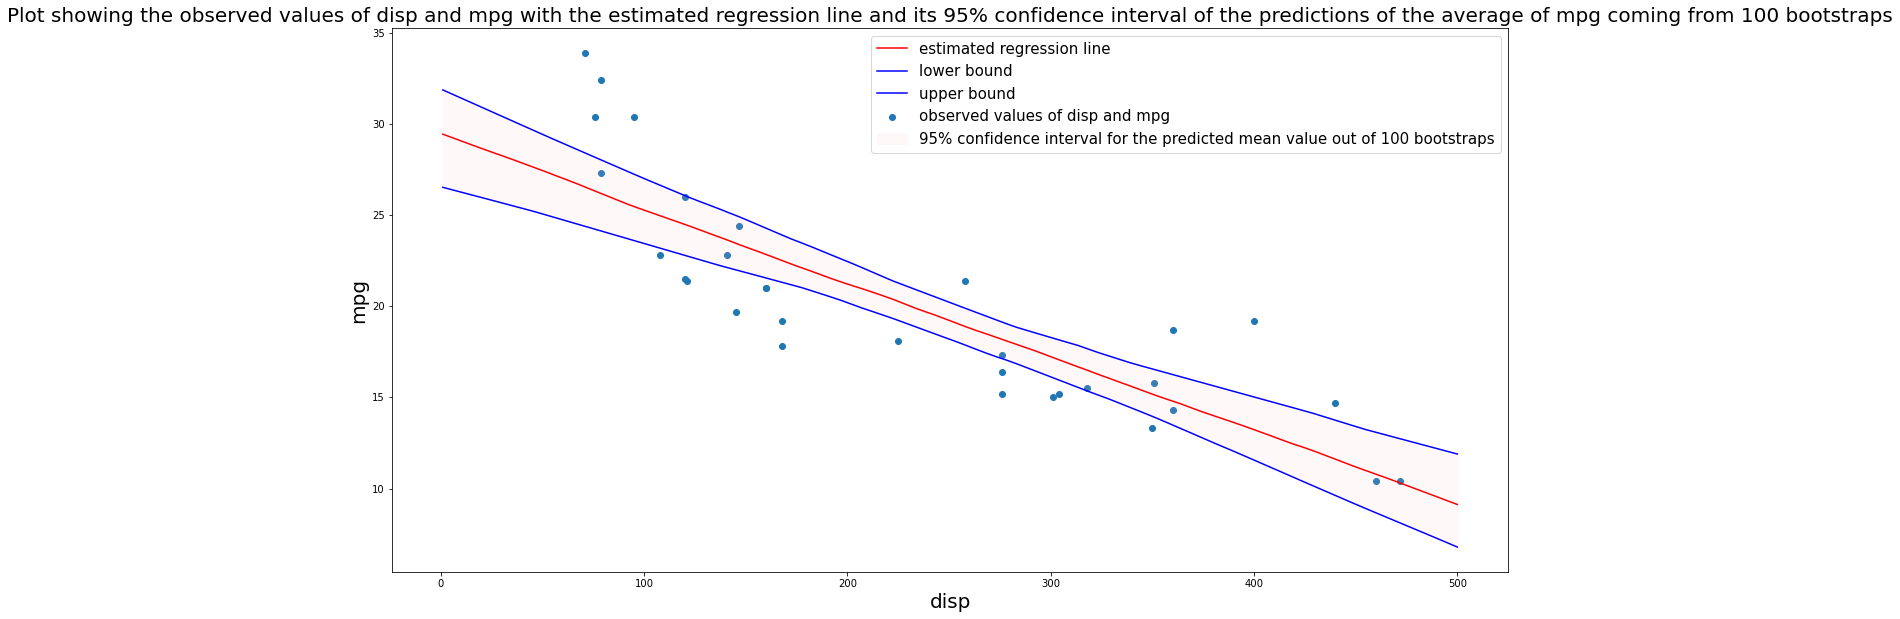

In [14]:
#USING MY PREDS FROM BETA 0 AND BETA1

plt.figure(figsize = (20, 10))


x = disp_summary[['x_disp']] 
y = disp_summary[['y']]

sorted_x = x.sort_values(['x_disp'])
sorted_y = y.sort_values(['y'])

print("In this plot I use the predictions I created my self with the beta0 ad beta1 out of each fitted linear model in each bootstrap")
plt.scatter(x, y, label='observed values of disp and mpg') 
plt.title('Plot showing the observed values of disp and mpg with the estimated regression line and its 95% confidence interval of the predictions of the average of mpg coming from 100 bootstraps', size = 20)
plt.plot(x_linspace, my_line_mean_mpg, color = 'red', label="estimated regression line") # estimated regression line
plt.plot(x_linspace, my_lower_b_preds, color = 'blue', label = 'lower bound') # lower bound of the confidence interval
plt.plot(x_linspace, my_upper_b_preds, color = 'blue', label = 'upper bound') # upper bound of the confidence interval
plt.fill_between(x_linspace.reshape(-1), my_lower_b_preds.reshape(-1), my_upper_b_preds.reshape(-1), color = 'pink', alpha = 0.1, label = '95% confidence interval for the predicted mean value out of 100 bootstraps')


plt.legend(fontsize = 15)
plt.xlabel('disp', size = 20)
plt.ylabel('mpg', size = 20)
plt.show()

In this plot I use the predictions coming from the .predict in each single bootstrap


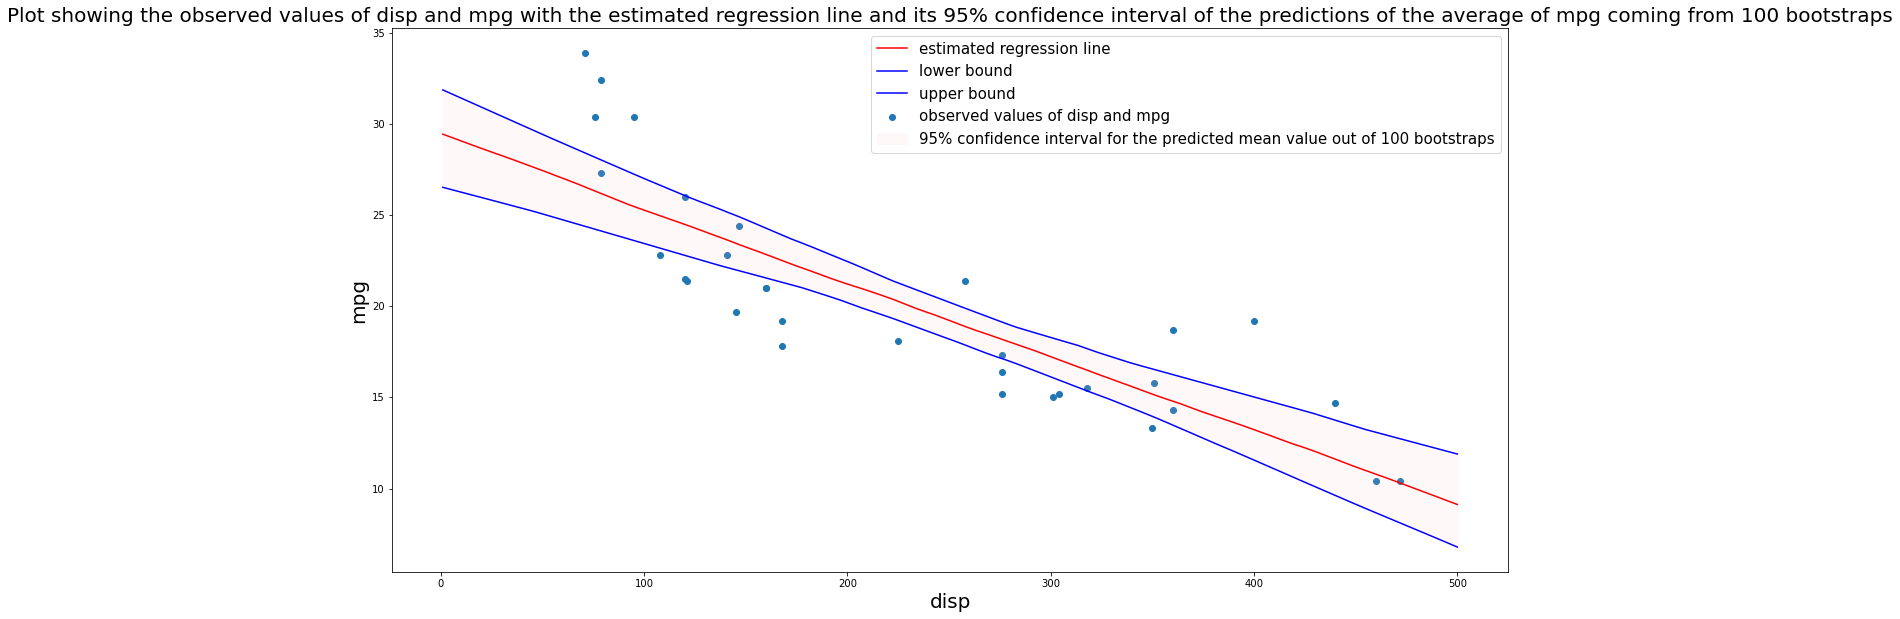

In [15]:
plt.figure(figsize = (20, 10))


x = disp_summary[['x_disp']] 
y = disp_summary[['y']]

sorted_x = x.sort_values(['x_disp'])
sorted_y = y.sort_values(['y'])
print("In this plot I use the predictions coming from the .predict in each single bootstrap")
plt.scatter(x, y, label='observed values of disp and mpg') 
plt.title('Plot showing the observed values of disp and mpg with the estimated regression line and its 95% confidence interval of the predictions of the average of mpg coming from 100 bootstraps', size = 20)
plt.plot(x_linspace, line_mean_mpg, color = 'red', label="estimated regression line") # estimated regression line
plt.plot(x_linspace, lower_b_preds, color = 'blue', label = 'lower bound') # lower bound of the confidence interval
plt.plot(x_linspace, upper_b_preds, color = 'blue', label = 'upper bound') # upper bound of the confidence interval
plt.fill_between(x_linspace.reshape(-1), lower_b_preds.reshape(-1), upper_b_preds.reshape(-1), color = 'pink',  alpha = 0.1, label = '95% confidence interval for the predicted mean value out of 100 bootstraps')


plt.legend(fontsize = 15)
plt.xlabel('disp', size = 20)
plt.ylabel('mpg', size = 20)
plt.show()

**Compared to the plot in 1.1, this plot seems to have a tighter confidence interval in the middle of the graph and seems wider on the ends.**


<div class='exercise-r'>

**1.6** Another interval of uncertainty in a regression model is called a *prediction interval*.  A prediction interval gives a range of plausible values for a future individual observation, $\hat{y}^*$, given a specific value of $x$ in general (`disp` here).  How should the 95\% prediction interval calculated at a `disp` value of 400 compare to the corresponding 95\% confidence interval for the mean predicted `mpg`?  Justify with a few sentences.

</div>

Our prediction has an error term, this comes from an error made of 2 errors (from slide 11 from 'Inference in Linear Regression' slides deck ): the irreducible observational error, and the misspecification error (coming from the fact hthat we actually do not actually know what f(x) exactly is, but we are simply estimating it). From the fact that we actually do not know f(x), every time we are fitting our linear model, we will get every time a new beta0 and a new beta1. See my lists above of beta0_list and beta1_list containing 100 different values. Given this, each prediction will have an error term. In this specific exercise, in exercise 1.3 we are predicting for a specific given value of disp (i.e. 400), there our prediction will have the error term coming from the different betas we will have every time due to the error stemming from the very estimation of f(x). Hence, the prediction interval for the prediction of disp = 400 will be larger than the CI of the mean of the estimated. From above:
    
$$\hat{y}^* = \hat{\mu}_{y_i} + \hat{\varepsilon}^* $$

I can actually see that the range of the CI (between mean_CI_lower and mean_CI_upper) for the prediciton based on disp=400 in exercise 1.3 is about 4 units. Whereas on exercise 1.1 (to predict the average of mpg with any disp) the distance between mean_CI_lower and mean_CI_upper was about 3 units.

**THE END**